# Introduction to Pandas and NumPy
Pandas and NumPy are foundational Python libraries for data analysis and scientific computing. NumPy provides the core array data structure and fast mathematical operations, while Pandas builds on top of NumPy to offer powerful, flexible data structures for working with labeled, tabular data. These libraries are essential for data cleaning, manipulation, exploration, and modeling in modern data science workflows.

- **NumPy** is the backbone for numerical computation in Python, enabling efficient storage and manipulation of large arrays and matrices of numeric data.
- **Pandas** extends these capabilities by introducing Series (1D labeled arrays) and DataFrames (2D labeled tables), making it easier to work with real-world data that often comes with labels, missing values, and mixed data types.

Understanding the strengths and use cases of each library is crucial for effective data analysis and machine learning.

---

# Topics Covered

1. **Introduction to Pandas and NumPy:** Overview of the libraries, their roles in data science, and key differences.
2. **Loading Data into Pandas:** How to import data from CSV and other sources, and initial inspection.
3. **First Steps After Loading Data:** Checking data types, missing values, outliers, and basic statistics.
4. **Categorical vs. Continuous Features:** Understanding feature types and their implications for analysis.
5. **Regression vs. Classification:** Distinguishing between prediction tasks and their evaluation.
6. **Exploratory Data Analysis (EDA):** Visualizing and summarizing data to uncover patterns and issues.
7. **Transforming Data Features:** Encoding, scaling, and engineering features for modeling.
8. **Extracting and Selecting Features:** Methods for selecting columns and preparing data for modeling.
9. **Feature Construction and Encoding:** Creating new features and encoding categorical variables.
10. **Working with Real Datasets:** Examples using vertebrae and missed appointment data.
11. **Unbalanced and Dirty Data:** Handling class imbalance and data quality issues.
12. **Regression and k-NN Examples:** Practical modeling with regression and k-nearest neighbors, including visualizations.
13. **Generalization, Overfitting, and Model Complexity:** Concepts for robust modeling.
14. **Summary and Self-Assessment:** Key takeaways and review questions to reinforce learning.

---

## Pandas vs. NumPy
NumPy and Pandas are often used together, but they serve different purposes:
- **NumPy** provides fast, memory-efficient arrays and basic numerical operations. It is ideal for mathematical and logical operations on homogeneous numerical data, such as vectors, matrices, and higher-dimensional arrays. NumPy arrays are the foundation for most scientific computing in Python.
- **Pandas** builds on NumPy, adding labeled, heterogeneous data structures (Series, DataFrame) and powerful data manipulation tools. Pandas is designed for working with tabular data (like spreadsheets or SQL tables), where columns can have different types and labels are important for indexing and alignment.

Key differences:
- NumPy arrays are always homogeneous (all elements must be the same type), while Pandas DataFrames can hold columns of different types (e.g., integers, floats, strings, dates).
- Pandas provides rich functionality for handling missing data, aligning data from different sources, and reshaping or pivoting tables.
- NumPy is best for numerical computation and linear algebra; Pandas is best for data wrangling, cleaning, and analysis.

$\text{NumPy: Fast, efficient, homogeneous arrays}$

$\text{Pandas: Labeled, heterogeneous, tabular data}$

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

**Code Explanation:**
This cell imports the two fundamental libraries for data analysis in Python:
1. **NumPy (`np`)**: Provides efficient numerical computing with arrays and mathematical operations
2. **Pandas (`pd`)**: Built on top of NumPy, provides high-level data structures (DataFrames, Series) and data analysis tools

These imports are typically done at the beginning of any data analysis notebook as they form the foundation for most data manipulation and analysis tasks.

---

# Loading Data into Pandas
Pandas makes it easy to load data from a variety of sources, including CSV, Excel, SQL databases, JSON, and more. The most common function is `pd.read_csv()`, which reads a comma-separated values (CSV) file into a DataFrame. DataFrames are the primary data structure in Pandas, allowing you to store and manipulate tabular data with labeled rows and columns.

When loading data, you can specify options to handle headers, missing values, data types, delimiters, and encoding. This flexibility is crucial for working with real-world datasets, which often require cleaning and preprocessing before analysis.

**Common options for `pd.read_csv()`:**
- `header`: Row to use as the column names (default is 0, the first row).
- `na_values`: Additional strings to recognize as NA/NaN.
- `dtype`: Specify data types for columns.
- `sep`: Delimiter to use (default is ',').
- `encoding`: File encoding (e.g., 'utf-8').

**Practical tips:**
- Always check the first few rows with `df.head()` and the last few with `df.tail()` to ensure data loaded as expected.
- Use `df.info()` to quickly inspect data types and non-null counts.
- If you encounter errors, check for encoding issues or irregular delimiters.
- For large files, use `nrows` to load a sample, or `chunksize` to process in batches.

Example:
- `pd.read_csv('data.csv')` loads a CSV file.
- `pd.read_excel('data.xlsx')` loads an Excel file.
- `pd.read_sql(query, connection)` loads data from a SQL database.

After loading, always inspect the first few rows with `df.head()` to verify the data was read correctly.





In [ ]:
# Load a sample dataset (day1.csv)
import pandas as pd
df = pd.read_csv('data/day1.csv')
display(df.head())
# Visualize missing values per column
missing = df.isnull().sum()
print('Missing values per column:')
print(missing)

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349
3,4,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,10.739832,108,1454,1562
4,5,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,12.522300,82,1518,1600


Missing values per column:
Unnamed: 0    0
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
tot           0
dtype: int64


**Code Explanation:**
This code cell demonstrates the basic data loading process in Pandas:
1. **Import pandas**: We import the pandas library which is essential for data manipulation
2. **Load CSV data**: `pd.read_csv()` reads the CSV file into a DataFrame, which is the primary data structure in pandas
3. **Display first rows**: `df.head()` shows the first 5 rows to give us a quick glimpse of the data structure and contents
4. **Check missing values**: `df.isnull().sum()` counts the number of missing (null) values in each column, which is crucial for data quality assessment

This is a fundamental workflow that should be performed whenever loading a new dataset.

## Summary
- Pandas provides powerful, flexible tools for loading data from many sources into DataFrames.
- Careful inspection after loading helps catch issues early, such as missing values, wrong data types, or encoding problems.
- Understanding the options in `pd.read_csv()` and related functions is essential for robust data analysis workflows.

## Review Questions
- What are some common sources from which you can load data into Pandas?
- Which function would you use to load a CSV file? An Excel file?
- What are some important options you can specify in `pd.read_csv()`?
- Why is it important to inspect your data immediately after loading it?

---

# First Steps After Loading Data
When you first load a dataset, it is important to perform some initial checks and exploration to understand its structure and quality. This process helps you identify potential issues early and plan your data cleaning and analysis steps.

**Key checks:**
- **Data types:** Are columns numeric, categorical, or mixed? Are any columns incorrectly typed (e.g., numbers stored as strings)?
- **Missing values:** Are there any missing or null values? Which columns are affected?
- **Outliers:** Are there values that are far outside the expected range?
- **Encoding issues:** Are there strange characters or encoding problems, especially with text data?
- **Target column type:** For supervised learning, is the target variable continuous (regression) or categorical (classification)?
- **Basic statistics:** Use `df.describe()` to get a summary of numeric columns, and `df.info()` for an overview of the DataFrame.
- **Duplicates:** Check for duplicate rows with `df.duplicated().sum()`.
- **Unique values:** Use `df.nunique()` to see how many unique values are in each column.

**Practical advice:**
- Use `df.sample(5)` to view a random sample of rows, which can help spot anomalies.
- For large datasets, use `df.memory_usage(deep=True)` to check memory usage.
- If you see unexpected data types, use `pd.to_numeric()` or `astype()` to convert columns as needed.

These checks help you decide how to clean, transform, and prepare your data for analysis or modeling.




Shape: (731, 17)
Columns: ['Unnamed: 0', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'tot']
Data types:
Unnamed: 0      int64
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
tot             int64
dtype: object
Missing values:
Unnamed: 0    0
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
tot           0
dtype: int64


,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
count,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,0.627894,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,0.142429,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,0.520000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,0.626667,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,0.730209,15.625371,1096.000000,4776.500000,5956.000000


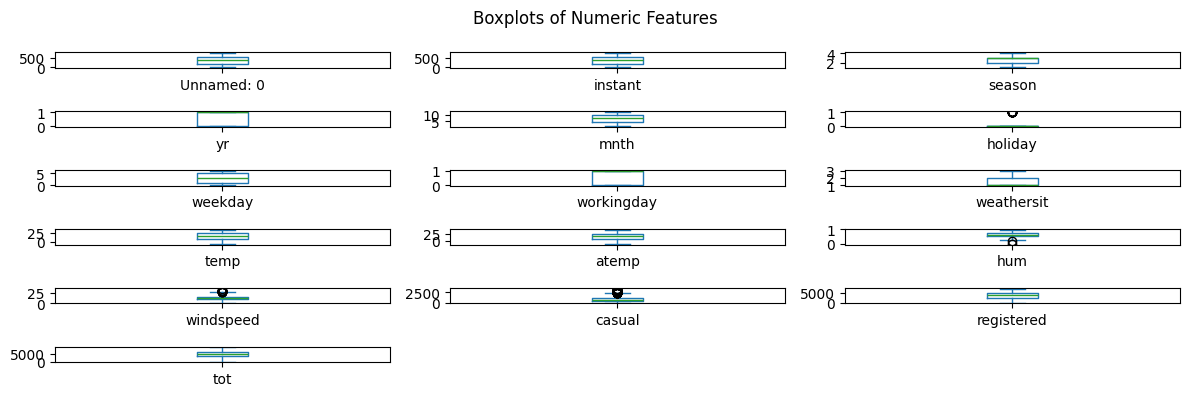

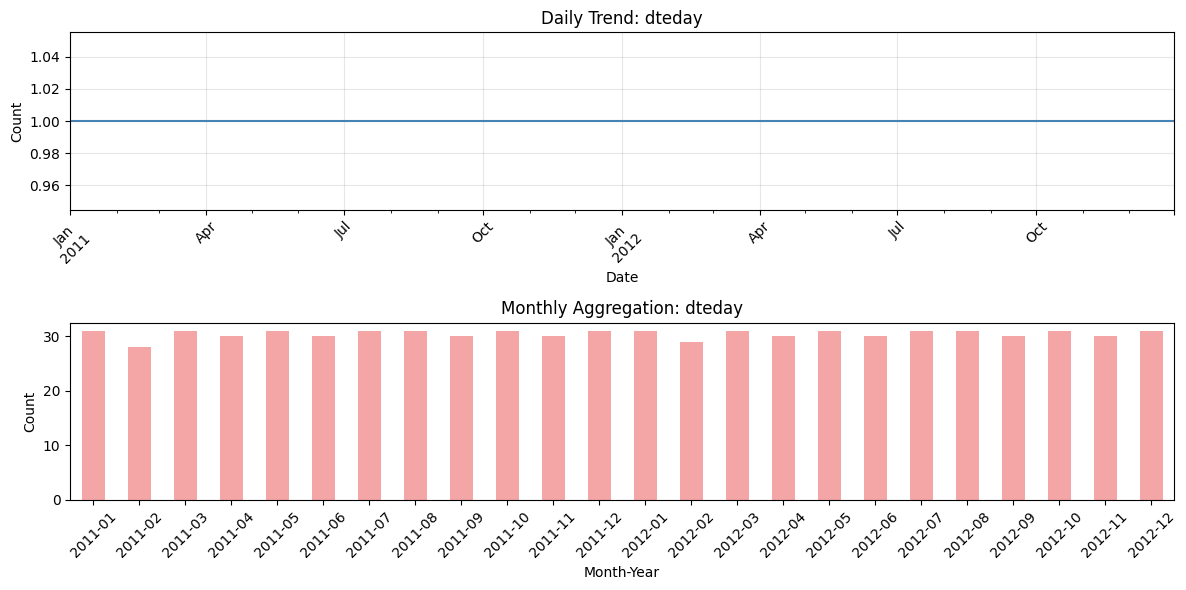

In [ ]:
# Examine the dataset
import matplotlib.pyplot as plt
import seaborn as sns
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Data types:')
print(df.dtypes)
print('Missing values:')
print(df.isnull().sum())
display(df.describe(include='all'))
# Visualize distributions of numeric columns
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) > 0:
    df[numeric_cols].plot(kind='box', subplots=True, layout=(-1, 3), figsize=(12, 4), sharex=False, sharey=False, title='Boxplots of Numeric Features')
    plt.tight_layout(); plt.show()
# Visualize value counts for categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if col == 'dteday':
        # Better visualization for date columns - convert to datetime and show trends
        plt.figure(figsize=(12, 6))

        # Convert to datetime if it's a date column
        try:
            df_temp = df.copy()
            df_temp[col] = pd.to_datetime(df_temp[col])

            # Create time-based aggregation
            daily_counts = df_temp[col].value_counts().sort_index()

            # Plot as line chart to show temporal trends
            plt.subplot(2, 1, 1)
            daily_counts.plot(kind='line', color='steelblue', linewidth=1.5)
            plt.title(f'Daily Trend: {col}')
            plt.ylabel('Count')
            plt.xlabel('Date')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)

            # Show monthly aggregation for cleaner view
            plt.subplot(2, 1, 2)
            monthly_counts = df_temp.groupby(df_temp[col].dt.to_period('M')).size()
            monthly_counts.plot(kind='bar', color='lightcoral', alpha=0.7)
            plt.title(f'Monthly Aggregation: {col}')
            plt.ylabel('Count')
            plt.xlabel('Month-Year')
            plt.xticks(rotation=45)

        except:
            # Fallback: show top 20 most frequent values
            top_values = df[col].value_counts().head(20)
            top_values.plot(kind='bar', color='skyblue')
            plt.title(f'Top 20 Values: {col}')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(5,2))
        df[col].value_counts(dropna=False).plot(kind='bar', color='skyblue')
        plt.title(f'Value Counts: {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(col)
        plt.tight_layout(); plt.show()

**Code Explanation:**
This comprehensive cell performs initial dataset exploration and visualization:

**Data Overview:**
- `df.shape`: Shows the dimensions (rows, columns) of the dataset
- `df.columns.tolist()`: Lists all column names
- `df.dtypes`: Shows the data type of each column
- `df.isnull().sum()`: Counts missing values per column
- `df.describe(include='all')`: Provides statistical summaries for all columns

**Visualization:**
- **Numeric columns**: Creates box plots to show distribution, outliers, and quartiles for all numeric features
- **Categorical columns**: Creates bar charts showing value counts for each category
- **Special handling for dates**: For date columns like 'dteday', creates time-series plots showing daily trends and monthly aggregations
- **Fallback visualization**: For columns with many unique values, shows only the top 20 most frequent values

This systematic approach helps identify data quality issues, understand distributions, and spot patterns before proceeding with analysis.

## Summary
- Initial data inspection is critical for understanding the structure and quality of your dataset.
- Checking data types, missing values, outliers, and encoding issues helps prevent problems later in your analysis.
- Use Pandas functions like `info()`, `describe()`, `head()`, and `duplicated()` to quickly assess your data.

## Review Questions
- What are the first things you should check after loading a dataset?
- How can you identify missing values in a DataFrame?
- Why is it important to check data types and unique values?
- What function would you use to get a summary of all columns in a DataFrame?

---

# Categorical vs. Continuous Features
Understanding the types of features in your dataset is crucial for choosing the right analysis and modeling techniques.

- **Categorical features**: These are variables that take on a limited set of distinct values or categories. Examples include gender (male/female), color (red/blue/green), or product type. Categorical features can be nominal (no natural order, e.g., color) or ordinal (with a natural order, e.g., education level: high school < bachelor < master < PhD).
- **Continuous features**: These are numeric variables that can take any value within a range. Examples include age, income, height, or temperature. Continuous features are typically measured and can have an infinite number of possible values within a given interval.

**Why does this matter?**
- Many machine learning algorithms require numerical input, so categorical features often need to be encoded (e.g., one-hot or ordinal encoding).
- Statistical summaries and visualizations differ: use bar plots for categorical, histograms for continuous.
- Some algorithms (e.g., tree-based models) can handle categorical features natively, but most require conversion.

**Practical examples:**
- Gender (categorical, nominal): Male, Female
- Education (categorical, ordinal): High School, Bachelors, Masters, PhD
- Age (continuous): 18, 25, 42, ...
- Salary (continuous): $35,000, $50,000, ...

$\text{Categorical:}\ x \in \{\text{red},\ \text{blue},\ \text{green}\}$

$\text{Continuous:}\ x \in \mathbb{R}$



## Summary
- Categorical features have a limited set of values and may be nominal or ordinal.
- Continuous features are numeric and can take any value within a range.
- Correctly identifying feature types is essential for preprocessing and choosing appropriate analysis methods.

## Review Questions
- What is the difference between a categorical and a continuous feature?
- Give an example of a nominal and an ordinal categorical feature.
- Why do we need to encode categorical features for many machine learning algorithms?
- What types of plots are appropriate for categorical vs. continuous features?

---

# Regression vs. Classification
In supervised machine learning, the type of prediction task determines the choice of algorithms and evaluation metrics.

- **Regression**: The goal is to predict a continuous numeric value, such as house price, temperature, or sales amount. Regression models estimate a function $f(X)$ that maps input features to a real-valued output. Common algorithms include linear regression, decision trees, and support vector regression.
- **Classification**: The goal is to predict a discrete label or category, such as spam/ham, disease/no disease, or digit recognition. Classification models assign input features to one of several classes. Algorithms include logistic regression, decision trees, k-nearest neighbors, and support vector machines.

**Key differences:**
- Regression outputs are continuous; classification outputs are discrete labels.
- Evaluation metrics differ: regression uses mean squared error (MSE), mean absolute error (MAE), etc.; classification uses accuracy, precision, recall, F1-score, etc.
- Some problems can be framed as either regression or classification depending on how the target variable is defined.

**Practical context:**
- Predicting house prices: regression
- Predicting whether a patient has a disease: classification
- Predicting the number of products sold: regression
- Predicting the category of an email (spam/ham): classification

Understanding the distinction is essential for selecting the right approach and interpreting results.

$\text{Regression:}\ y \in \mathbb{R}$
$\text{Classification:}\ y \in \{0, 1, \ldots, K\}$


## Summary
- Regression predicts continuous values; classification predicts discrete categories.
- The choice of task affects algorithm selection and evaluation metrics.
- Some problems can be approached as either regression or classification, depending on the target variable.

## Review Questions
- What is the main difference between regression and classification tasks?
- Give an example of a regression problem and a classification problem.
- What are common evaluation metrics for regression? For classification?
- Can a problem be framed as both regression and classification? Give an example.

---

# Exploratory Data Analysis (EDA)
EDA involves visualizing and summarizing data to understand its structure and relationships. It is a critical first step before modeling, as it helps uncover patterns, spot anomalies, and generate hypotheses.

**Key steps in EDA:**
- **Visualize distributions:** Use histograms, boxplots, and density plots to understand the spread and shape of each feature.
- **Examine relationships:** Use scatter plots, pair plots, and correlation matrices to explore relationships between features and the target variable.
- **Identify missing values and outliers:** Visual tools and summary statistics can help spot data quality issues.
- **Summarize statistics:** Use `df.describe()` for numeric features and `df.describe(include='object')` for categorical features.
- **Group and aggregate:** Use `groupby()` to compare statistics across categories.

**Practical tips:**
- Use `sns.pairplot(df)` (from seaborn) for quick multivariate visualization.
- For large datasets, sample a subset for plotting to improve performance.
- Always look for unexpected patterns or inconsistencies that may indicate data issues.

$\text{EDA: Visualize, summarize, and clean data before modeling}$




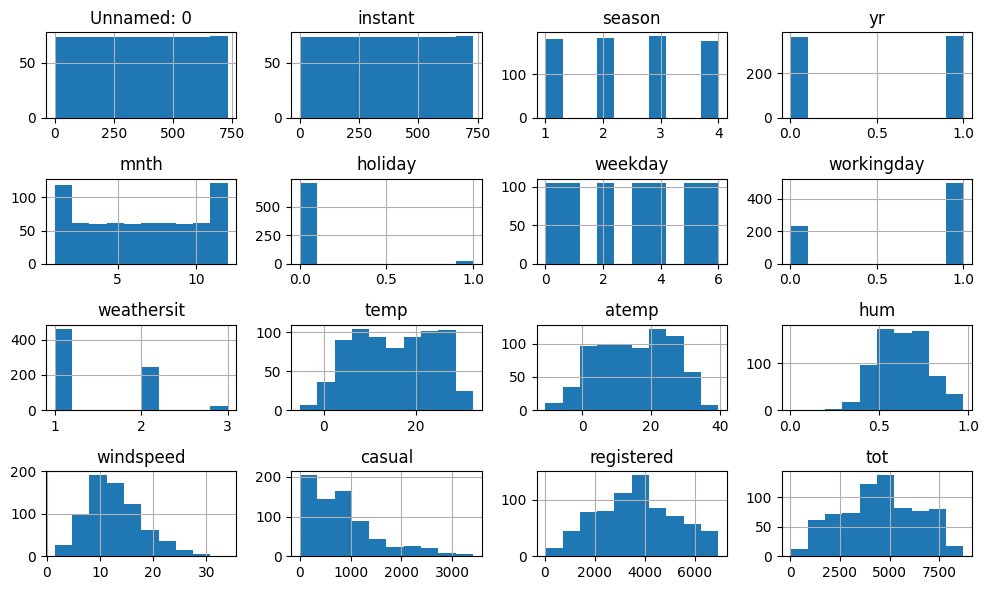

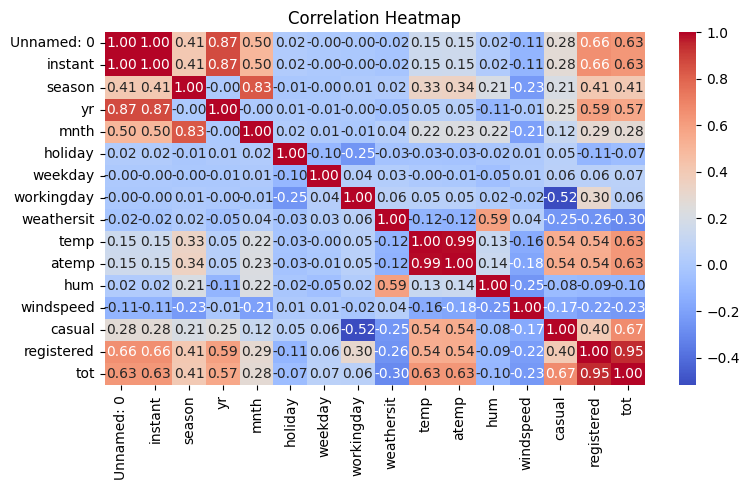

In [ ]:
# Example: Plotting distributions and relationships
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()
# Pairplot for numeric features (if not too many)
if df.select_dtypes(include='number').shape[1] <= 6:
    sns.pairplot(df, diag_kind='kde')
    plt.suptitle('Pairplot of Numeric Features', y=1.02)
    plt.show()
# Correlation heatmap
if df.select_dtypes(include='number').shape[1] > 1:
    plt.figure(figsize=(8, 5))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout(); plt.show()

**Code Explanation:**
This cell demonstrates key EDA (Exploratory Data Analysis) techniques:

**1. Histograms (`df.hist()`):**
- Shows the distribution of all numeric columns in the dataset
- Helps identify skewness, outliers, and the shape of data distributions

**2. Pairplot (`sns.pairplot()`):**
- Creates scatter plots for all pairs of numeric variables
- Shows relationships and correlations between features
- Only executed if there are 6 or fewer numeric columns to avoid overcrowding

**3. Correlation Heatmap (`sns.heatmap()`):**
- Visualizes correlation coefficients between numeric variables
- Uses color coding to show strength and direction of correlations
- Helps identify highly correlated features that might cause multicollinearity

These visualizations are essential for understanding your data before building models and can reveal important patterns, outliers, and relationships.

## Summary
- EDA helps you understand your data, spot problems, and generate insights before modeling.
- Visualization and summary statistics are key tools in EDA.
- Identifying issues early saves time and improves model quality.

## Review Questions
- What is the purpose of EDA?
- Name three types of plots useful for EDA.
- How can you identify outliers or missing values during EDA?
- Why is it important to perform EDA before building models?

---

# Transforming Data Features
Transforming features can make data more meaningful for analysis and modeling. Feature transformation is a key part of data preprocessing and feature engineering.

**Common transformations:**
- **Convert categorical to numerical:** Use encoding techniques such as one-hot encoding, label encoding, or ordinal mapping.
- **Normalize or scale features:** Standardize features to have zero mean and unit variance (z-score), or scale to a fixed range (min-max scaling). This is important for algorithms sensitive to feature scale (e.g., k-NN, SVM).
- **Create new features (feature engineering):** Combine or transform existing features to create more informative variables (e.g., BMI from height and weight, age groups from age).
- **Log or power transforms:** Apply log, square root, or other transformations to reduce skewness or stabilize variance.

**Practical advice:**
- Always fit scaling/encoding on the training set and apply to the test set to avoid data leakage.
- Use `sklearn.preprocessing` for robust, reusable transformations.
- Document your transformations for reproducibility.

$\text{Feature transformation:}\ x' = f(x)$





In [ ]:
# Example: Convert categorical to numerical
if 'Gender' in df.columns:
    df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})
display(df.head())
# Visualize the effect of encoding
if 'Gender' in df.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(x='Gender', data=df, palette='pastel')
    plt.title('Gender Distribution (Original)')
    plt.tight_layout(); plt.show()
    if 'Gender_num' in df.columns:
        plt.figure(figsize=(5,2))
        sns.histplot(df['Gender_num'], bins=2, discrete=True, color='orange')
        plt.title('Gender (Encoded Numeric)')
        plt.tight_layout(); plt.show()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349
3,4,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,10.739832,108,1454,1562
4,5,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,12.522300,82,1518,1600


**Code Explanation:**
This cell demonstrates categorical feature encoding and visualization:

**1. Label Encoding (`map()`):**
- Converts categorical 'Gender' values to numeric (Male=0, Female=1)
- Uses dictionary mapping for binary categorical variables
- Creates a new column 'Gender_num' while preserving the original

**2. Visualization Comparison:**
- **Original data**: Uses `sns.countplot()` to show category counts as a bar chart
- **Encoded data**: Uses `sns.histplot()` to show the numeric encoding distribution
- This comparison helps verify the encoding worked correctly

**3. Conditional Execution:**
- Checks if 'Gender' column exists before processing
- Uses defensive programming to avoid errors with different datasets

This approach is useful for binary categorical variables, while one-hot encoding (shown in other cells) is better for nominal categories with more than 2 values.

## Summary
- Feature transformation prepares data for modeling and can improve model performance.
- Common transformations include encoding, scaling, and feature engineering.
- Proper transformation prevents data leakage and ensures fair model evaluation.

## Review Questions
- Why do we need to transform features before modeling?
- What is the difference between normalization and standardization?
- Give an example of feature engineering.
- Why is it important to avoid data leakage during transformation?

---

# Understanding and Examination of Data Set
A thorough understanding of your dataset is essential for effective analysis and modeling. This involves more than just looking at the data—it requires investigating the context, quality, and meaning of each feature.

**Key steps:**
- **Check for duplicates:** Use `df.duplicated().sum()` to find duplicate rows, which can bias analysis.
- **Identify outliers:** Use boxplots, z-scores, or the IQR method to detect values far from the norm.
- **Check for inconsistencies:** Look for impossible or illogical values (e.g., negative ages, future dates).
- **Understand feature context:** Know what each column represents, its units, and its relevance to the problem.
- **Consult documentation:** If available, read the data dictionary or metadata to clarify feature meanings.
- **Assess data quality:** Consider completeness, consistency, and accuracy. Missing or incorrect data can lead to misleading results.

**Practical steps:**
- Visualize distributions and relationships to spot anomalies.
- Summarize categorical features with `value_counts()` and continuous features with `describe()`.
- Collaborate with domain experts to interpret ambiguous features.

$\text{Data quality: completeness, consistency, accuracy}$



## Summary
- Understanding your dataset's structure, context, and quality is crucial for reliable analysis.
- Checking for duplicates, outliers, and inconsistencies helps ensure data integrity.
- Knowing the meaning of each feature guides effective preprocessing and modeling.

## Review Questions
- Why is it important to check for duplicates and outliers?
- How can you identify inconsistencies in your data?
- What resources can help you understand the meaning of each feature?
- What are the three main aspects of data quality?

---

# Target Column Outcomes
The target column (also called the dependent variable or label) is the variable you want to predict in supervised learning. Understanding its properties is essential for choosing the right modeling approach and evaluation metrics.

**Key steps:**
- **Identify the target variable:** Know which column is the target for your prediction task.
- **Check its distribution:** Use `value_counts()` for categorical targets and `hist()` or `describe()` for continuous targets. Imbalanced or skewed distributions may require special handling.
- **Assess class balance:** For classification, check if one class dominates (unbalanced data). For regression, look for outliers or skewness.
- **Understand target meaning:** Know what the target represents and its units or categories.
- **Check for missing or invalid values:** Missing targets can complicate training and evaluation.

**Practical advice:**
- For imbalanced classification, consider resampling techniques or use metrics like ROC-AUC, precision-recall.
- For regression, consider transforming the target if it is highly skewed (e.g., log-transform).
- Always visualize the target distribution before modeling.

$\text{Target:}\ y$





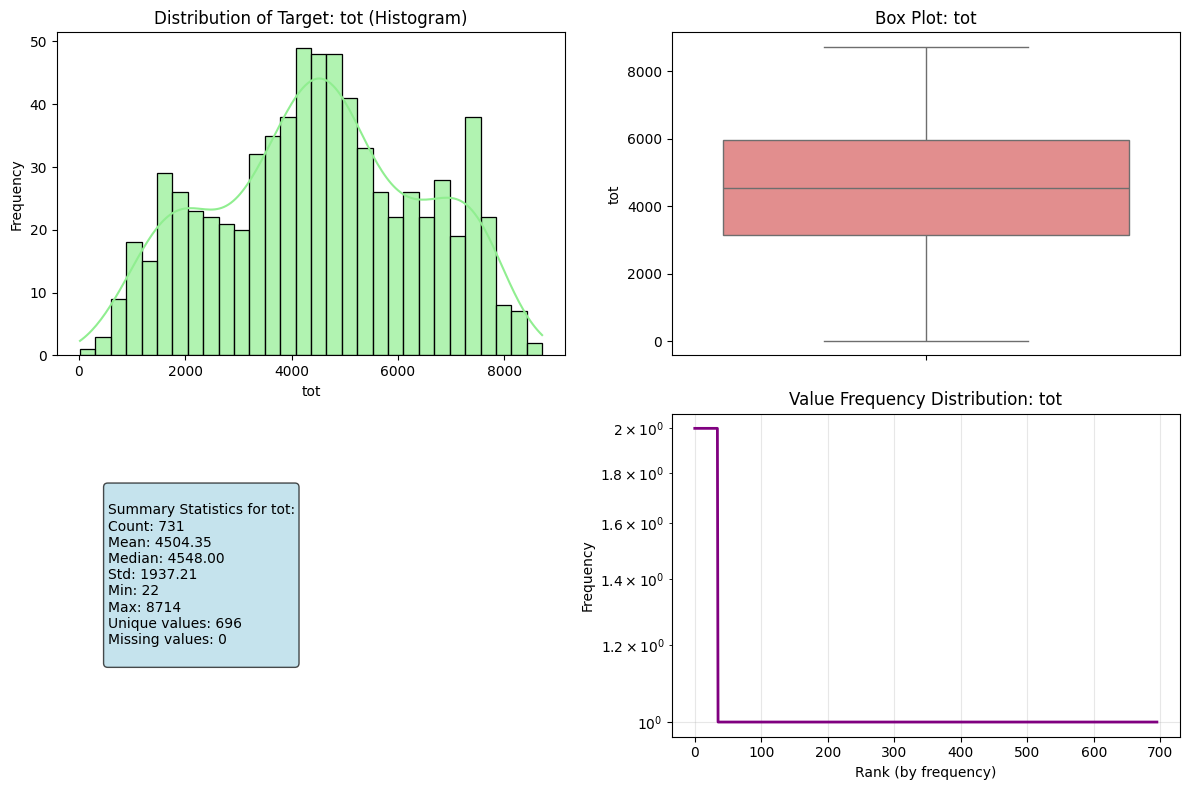

In [ ]:
# Example: Check target distribution
target_col = df.columns[-1]
special_cols = ['count', 'tot']
if target_col in special_cols:
    # Better visualization for target columns with many unique values
    plt.figure(figsize=(12, 8))

    # Get value counts and basic statistics
    value_counts = df[target_col].value_counts(dropna=False)

    # Top subplot: Histogram/distribution view
    plt.subplot(2, 2, 1)
    if pd.api.types.is_numeric_dtype(df[target_col]):
        # For numeric targets, show histogram
        sns.histplot(df[target_col], bins=30, kde=True, color='lightgreen', alpha=0.7)
        plt.title(f'Distribution of Target: {target_col} (Histogram)')
        plt.xlabel(target_col)
        plt.ylabel('Frequency')
    else:
        # For categorical, show top 20 values
        top_20 = value_counts.head(20)
        top_20.plot(kind='bar', color='lightgreen')
        plt.title(f'Top 20 Values: {target_col}')
        plt.xlabel(target_col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

    # Bottom left: Box plot (if numeric)
    plt.subplot(2, 2, 2)
    if pd.api.types.is_numeric_dtype(df[target_col]):
        sns.boxplot(y=df[target_col], color='lightcoral')
        plt.title(f'Box Plot: {target_col}')
        plt.ylabel(target_col)
    else:
        # Value distribution pie chart for top categories
        top_10 = value_counts.head(10)
        other_count = value_counts.iloc[10:].sum() if len(value_counts) > 10 else 0
        if other_count > 0:
            plot_data = pd.concat([top_10, pd.Series({'Others': other_count})])
        else:
            plot_data = top_10
        plot_data.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution: {target_col} (Top Categories)')
        plt.ylabel('')

    # Bottom right: Summary statistics
    plt.subplot(2, 2, 3)
    plt.axis('off')
    if pd.api.types.is_numeric_dtype(df[target_col]):
        stats_text = f"""
Summary Statistics for {target_col}:
Count: {df[target_col].count()}
Mean: {df[target_col].mean():.2f}
Median: {df[target_col].median():.2f}
Std: {df[target_col].std():.2f}
Min: {df[target_col].min()}
Max: {df[target_col].max()}
Unique values: {df[target_col].nunique()}
Missing values: {df[target_col].isnull().sum()}
        """
    else:
        stats_text = f"""
Summary Statistics for {target_col}:
Total count: {df[target_col].count()}
Unique values: {df[target_col].nunique()}
Most frequent: {value_counts.index[0]}
Frequency: {value_counts.iloc[0]}
Missing values: {df[target_col].isnull().sum()}
        """
    plt.text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    # Fourth subplot: Trend analysis (if many unique values)
    plt.subplot(2, 2, 4)
    if df[target_col].nunique() > 50:
        # Show value frequency trend
        freq_dist = value_counts.values
        plt.plot(range(len(freq_dist)), freq_dist, color='purple', linewidth=2)
        plt.title(f'Value Frequency Distribution: {target_col}')
        plt.xlabel('Rank (by frequency)')
        plt.ylabel('Frequency')
        plt.yscale('log')
        plt.grid(True, alpha=0.3)
    else:
        # Show simple bar chart of all values
        value_counts.plot(kind='bar', color='orange', alpha=0.7)
        plt.title(f'All Values: {target_col}')
        plt.xlabel('Values')
        plt.ylabel('Count')
        plt.xticks(rotation=90, ha='right', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    df[target_col].value_counts(dropna=False).plot(kind='bar', color='lightgreen')
    plt.title(f'Distribution of Target: {target_col}')
    plt.ylabel('Count')
    plt.tight_layout(); plt.show()
# If classification, show pie chart
if df[target_col].dtype == 'object' or df[target_col].nunique() < 10:
    df[target_col].value_counts(dropna=False).plot.pie(autopct='%1.1f%%', figsize=(4,4), title='Target Class Proportions')
    plt.ylabel(''); plt.tight_layout(); plt.show()

**Code Explanation:**
This comprehensive cell analyzes the target variable (last column) with multiple visualizations:

**1. Target Identification:**
- `target_col = df.columns[-1]` automatically selects the last column as the target
- Special handling for common target column names like 'count' and 'tot'

**2. Multi-panel Visualization (2x2 subplot layout):**
- **Panel 1**: Histogram or bar chart showing target distribution
- **Panel 2**: Box plot (numeric) or pie chart (categorical) for outlier detection
- **Panel 3**: Summary statistics displayed as formatted text
- **Panel 4**: Frequency trend analysis or simple bar chart

**3. Data Type Handling:**
- Uses `pd.api.types.is_numeric_dtype()` to determine if target is numeric or categorical
- Different visualizations based on data type and number of unique values
- Adaptive approach based on data characteristics

**4. Class Balance Assessment:**
- For classification: Creates pie chart to show class proportions
- Helps identify imbalanced datasets that may need special handling

This systematic target analysis is crucial for choosing appropriate modeling approaches and evaluation metrics.

## Summary
- The target column is the variable you want to predict; its properties affect model choice and evaluation.
- Checking the distribution and balance of the target helps identify potential issues early.
- Understanding the target's meaning is crucial for interpreting results.

## Review Questions
- How do you identify the target column in a dataset?
- Why is it important to check the distribution of the target variable?
- What problems can arise from an unbalanced target in classification?
- What are some ways to handle missing or skewed target values?

---

# Extracting Feature Columns in Pandas
Selecting the right features (columns) from your DataFrame is a fundamental step in data analysis and modeling. Pandas provides several flexible ways to extract columns by name, position, or condition.

**Common methods:**
- **By name:** `df['col']` or `df[['col1', 'col2']]` selects one or more columns by their names.
- **By position:** `df.iloc[:, idx]` selects columns by integer position (e.g., first column is 0).
- **By label:** `df.loc[:, 'col']` selects columns by label, supporting slicing and boolean indexing.
- **By list:** `df[['col1', 'col2']]` selects multiple columns at once.
- **By data type:** Use `df.select_dtypes(include='number')` to select all numeric columns.

**Practical tips:**
- Use `df.columns` to list all column names.
- For feature selection, you can use boolean masks or drop irrelevant columns with `df.drop()`.
- When preparing data for modeling, separate features (X) from the target (y) to avoid data leakage.

$\text{Feature extraction:}\ X = df[\text{features}]$





,Unnamed: 0,instant,dteday
0,1,1,2011-01-01
1,2,2,2011-01-02
2,3,3,2011-01-03
3,4,4,2011-01-04
4,5,5,2011-01-05


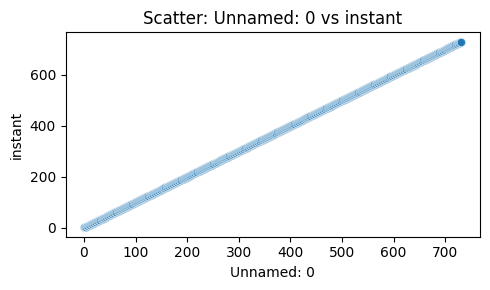

In [ ]:
# Examples of extracting columns
first_col = df.iloc[:, 0]
named_col = df['Gender'] if 'Gender' in df.columns else None
subset = df.loc[:, df.columns[:3]]
display(subset.head())
# Visualize extracted columns
if 'Gender' in df.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(x='Gender', data=df, palette='Set2')
    plt.title('Gender Distribution')
    plt.tight_layout(); plt.show()
# Scatter plot for first two numeric columns
num_cols = df.select_dtypes(include='number').columns
if len(num_cols) >= 2:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=num_cols[0], y=num_cols[1], data=df, alpha=0.6)
    plt.title(f'Scatter: {num_cols[0]} vs {num_cols[1]}')
    plt.tight_layout(); plt.show()

**Code Explanation:**
This cell demonstrates various methods for extracting and selecting columns from a DataFrame:

**1. Column Selection Methods:**
- **Position-based**: `df.iloc[:, 0]` selects the first column by index
- **Name-based**: `df['Gender']` selects by column name (with existence check)
- **Slice selection**: `df.loc[:, df.columns[:3]]` selects first 3 columns by label

**2. Visualization Examples:**
- **Categorical data**: Uses `sns.countplot()` to show distribution of 'Gender' column
- **Numeric relationships**: Creates scatter plot between first two numeric columns
- Demonstrates how to visualize extracted features

**3. Defensive Programming:**
- Checks column existence before accessing ('Gender' in df.columns)
- Verifies sufficient numeric columns before plotting (len(num_cols) >= 2)
- Prevents errors when working with different datasets

**4. Data Type Filtering:**
- `df.select_dtypes(include='number')` automatically finds numeric columns
- Shows how to separate different data types for appropriate analysis

This demonstrates the foundation for feature engineering and model preparation workflows.

## Summary
- Pandas offers multiple ways to extract columns by name, position, or type.
- Proper feature selection is essential for effective analysis and modeling.
- Always separate features from the target variable before training models.

## Review Questions
- How do you select a single column by name? Multiple columns?
- What is the difference between `iloc` and `loc`?
- How can you select all numeric columns in a DataFrame?
- Why is it important to separate features from the target variable?

---

# Obtaining Numerical Features from Categorical Columns
- Use `pd.get_dummies()` for one-hot encoding.
- Use `map()` or `replace()` for ordinal or binary features.

$\text{One-hot:}\ X_{\text{cat}} \rightarrow X_{\text{num}}$

In [ ]:
# One-hot encoding example
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Unnamed: 0,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,dteday_2012-12-22,dteday_2012-12-23,dteday_2012-12-24,dteday_2012-12-25,dteday_2012-12-26,dteday_2012-12-27,dteday_2012-12-28,dteday_2012-12-29,dteday_2012-12-30,dteday_2012-12-31
0,1,1,1,0,1,0,6,0,2,8.175849,...,False,False,False,False,False,False,False,False,False,False
1,2,2,1,0,1,0,0,0,2,9.083466,...,False,False,False,False,False,False,False,False,False,False
2,3,3,1,0,1,0,1,1,1,1.229108,...,False,False,False,False,False,False,False,False,False,False
3,4,4,1,0,1,0,2,1,1,1.400000,...,False,False,False,False,False,False,False,False,False,False
4,5,5,1,0,1,0,3,1,1,2.666979,...,False,False,False,False,False,False,False,False,False,False


**Code Explanation:**
This cell demonstrates one-hot encoding for categorical variables:

**1. One-Hot Encoding (`pd.get_dummies()`):**
- Converts all categorical columns into binary (0/1) dummy variables
- Creates new columns for each unique category value
- `drop_first=True` removes one category to avoid multicollinearity (dummy variable trap)

**2. Result Display:**
- `df_encoded.head()` shows the first few rows of the transformed dataset
- Categorical columns are replaced with multiple binary columns
- Each original category becomes a separate column with 1/0 values

**3. When to Use:**
- Best for nominal categorical variables (no natural order)
- Required for most machine learning algorithms that need numeric input
- Alternative to label encoding when categories don't have inherent ordering

This transformation is essential for preparing categorical data for machine learning models.

---

# Mapping of Ordinal Features
Ordinal features have a natural order. Map them to integers.

$\text{Ordinal mapping:}\ x \in \{\text{low}, \text{medium}, \text{high}\} \rightarrow \{0, 1, 2\}$

In [ ]:
# Example: Map ordinal feature
if 'Education' in df.columns:
    order = {'High School': 0, 'Bachelors': 1, 'Masters': 2, 'PhD': 3}
    df['Education_ord'] = df['Education'].map(order)
df.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349
3,4,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,10.739832,108,1454,1562
4,5,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,12.522300,82,1518,1600


**Code Explanation:**
This cell demonstrates ordinal encoding for categorical variables with natural ordering:

**1. Ordinal Mapping:**
- Creates a dictionary mapping education levels to integers: High School=0, Bachelors=1, Masters=2, PhD=3
- Uses `df['Education'].map(order)` to apply the mapping
- Preserves the natural order/hierarchy of education levels

**2. Conditional Processing:**
- Checks if 'Education' column exists before processing
- Defensive programming prevents errors with different datasets

**3. When to Use Ordinal vs One-Hot:**
- **Ordinal encoding**: Use when categories have natural order (like education, ratings, sizes)
- **One-hot encoding**: Use when categories are nominal with no inherent order (like colors, countries)

**4. Result Verification:**
- `df.head()` shows both original and encoded columns
- Allows verification that mapping worked correctly

This approach preserves the ordinal relationship between categories, which can be important for model performance.

# Crosstab and Confusion Matrix
- `pd.crosstab()` summarizes relationships between two categorical variables.
- Confusion matrix evaluates classification predictions.

$\text{Confusion matrix:}\ \begin{bmatrix} \text{TP} & \text{FP} \\ \text{FN} & \text{TN} \end{bmatrix}$

In [ ]:
# Example: Crosstab
import pandas as pd
if df.shape[1] >= 2:
    col1, col2 = df.columns[1:3]
    display(pd.crosstab(df[col1], df[col2]))
else:
    print('Not enough columns for crosstab demonstration.')

dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Code Explanation:**
This cell demonstrates creating crosstab tables to analyze relationships between categorical variables:

**1. Column Selection:**
- `df.columns[1:3]` selects the 2nd and 3rd columns for analysis
- Avoids the first column which might be an index or ID

**2. Crosstab Analysis:**
- `pd.crosstab(df[col1], df[col2])` creates a contingency table
- Shows frequency counts for each combination of categories
- Helps identify relationships and patterns between categorical variables

**3. Defensive Programming:**
- Checks if dataset has enough columns (`df.shape[1] >= 2`)
- Prevents errors when working with small datasets

**4. Use Cases:**
- Analyze relationships between categorical features
- Identify potential feature interactions
- Foundation for statistical tests (chi-square, independence tests)
- Useful for data validation and quality checking

Crosstabs are essential for understanding categorical data relationships before modeling.

# Feature Construction
- Combine or transform features to create new, more informative variables.

$\text{Feature construction:}\ x_{\text{new}} = f(x_1, x_2, \ldots)$

,instant,season,FeatureSum
0,1,1,2
1,2,1,3
2,3,1,4
3,4,1,5
4,5,1,6


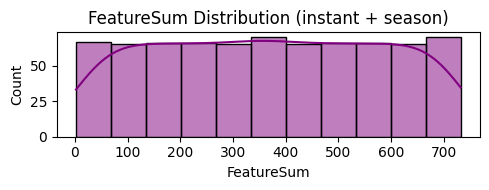

In [ ]:
# Example: Construct a new feature
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) >= 2:
    # Create a new feature as the sum of the first two numeric columns
    col1, col2 = numeric_cols[1:3]
    df['FeatureSum'] = df[col1] + df[col2]
    display(df[[col1, col2, 'FeatureSum']].head())
    plt.figure(figsize=(5,2))
    sns.histplot(df['FeatureSum'], kde=True, color='purple')
    plt.title(f'FeatureSum Distribution ({col1} + {col2})')
    plt.tight_layout(); plt.show()
else:
    print('Not enough numeric columns for feature construction demonstration.')

**Code Explanation:**
This cell demonstrates feature engineering by creating new features from existing ones:

**1. Feature Construction:**
- `df['FeatureSum'] = df[col1] + df[col2]` creates a new feature by adding two numeric columns
- Shows how to combine existing features to create potentially more informative variables

**2. Column Selection:**
- `numeric_cols[1:3]` selects the 2nd and 3rd numeric columns (avoiding potential index columns)
- `df.select_dtypes(include='number')` automatically identifies numeric columns

**3. Visualization:**
- `sns.histplot()` shows the distribution of the new engineered feature
- Helps assess whether the new feature has useful properties (spread, normality, etc.)

**4. Feature Engineering Benefits:**
- Can capture relationships between variables that individual features miss
- May improve model performance by providing more relevant information
- Examples: BMI from height/weight, ratios, combinations, transformations

**5. Defensive Programming:**
- Checks for sufficient numeric columns before proceeding
- Prevents errors when working with datasets lacking numeric features

This demonstrates the creative aspect of feature engineering in machine learning workflows.

---

# Vertebrae and Missed Appointment Data Examples
- Use the vertebrae dataset for classification.
- Use the missed appointment dataset for unbalanced data examples.

$\text{Unbalanced:}\ \#\text{majority} \gg \#\text{minority}$

In [ ]:
# Example: Load vertebrae data
import pandas as pd
vertebrae = pd.read_csv('New_data/column_3C.dat', sep=' ', header=None)
vertebrae.head()

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


**Code Explanation:**
This cell loads a specialized dataset for classification examples:

**1. Different File Format:**
- Uses `sep=' '` to specify space-separated values instead of comma-separated
- `header=None` indicates the file has no column headers
- Demonstrates loading data from different file formats (.dat vs .csv)

**2. Dataset Purpose:**
- Vertebrae dataset is commonly used for medical classification problems
- Typically contains measurements related to spinal column diagnosis
- Good example for binary or multi-class classification tasks

**3. Data Inspection:**
- `vertebrae.head()` shows the first few rows of the loaded data
- Without headers, columns will be numbered (0, 1, 2, etc.)
- Important to understand data structure for proper analysis

This demonstrates the flexibility needed when working with real-world datasets that come in various formats.

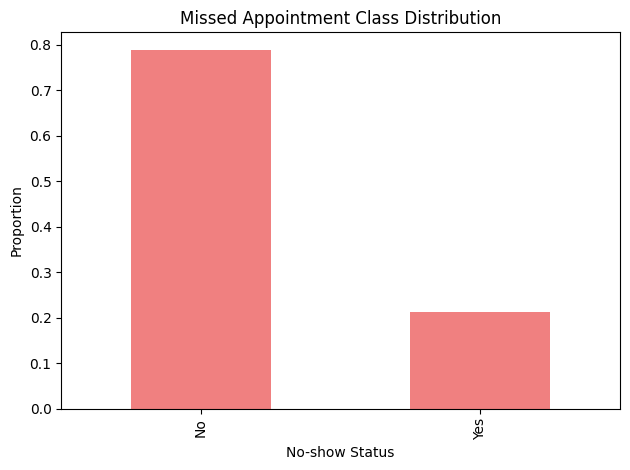

In [ ]:
# Example: Load missed appointment data
import pandas as pd
import matplotlib.pyplot as plt
missed = pd.read_csv('data/KaggleV2-May-2016.csv')
missed['No-show'].value_counts(normalize=True).plot(kind='bar', color='lightcoral')
plt.title('Missed Appointment Class Distribution')
plt.xlabel('No-show Status')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

**Code Explanation:**
This cell loads and visualizes an imbalanced classification dataset:

**1. Dataset Loading:**
- Loads a real-world dataset about medical appointment no-shows
- Demonstrates working with imbalanced data (common in real applications)

**2. Class Distribution Analysis:**
- `value_counts(normalize=True)` shows proportions rather than raw counts
- `plot(kind='bar')` creates a bar chart showing class imbalance
- Visualization helps identify the degree of class imbalance

**3. Imbalanced Data Characteristics:**
- One class (likely "No" - patients who showed up) dominates
- Minority class (likely "Yes" - no-shows) is much smaller
- This type of imbalance is common in real-world classification problems

**4. Why This Matters:**
- Imbalanced datasets can bias models toward the majority class
- Requires special techniques: resampling, different metrics (precision/recall), cost-sensitive learning
- Important to identify early in the analysis process

This example prepares students for real-world data science challenges where perfect class balance is rare.

---

# Unbalanced Data Definition
Unbalanced data occurs when one class is much more frequent than others.

$\text{Unbalanced:}\ P(y=0) \gg P(y=1)$

# Dirty Data and P-Hacking Defined
- **Dirty data**: Data with errors, inconsistencies, or missing values.
- **P-hacking**: Manipulating data or analysis to obtain statistically significant results.

$\text{Dirty data:}\ x\ \text{contains errors or noise}$
$\text{P-hacking:}\ \text{manipulate analysis for significance}$

---

# Regression
Regression predicts a continuous outcome variable.

$y = f(X) + \epsilon$

Regression coefficients: [ 4.73610710e-14  4.75175455e-14 -1.43770629e-13 -7.81182465e-13
 -7.20077210e-14 -8.41660981e-13  4.31482753e-14 -1.59914103e-12
  3.57844683e-13  5.49018296e-14  1.89021975e-14  3.15362307e-13
  8.73801899e-15  1.00000000e+00  1.00000000e+00 -9.64228697e-14]


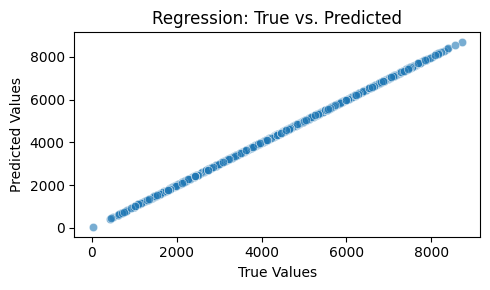

In [ ]:
# Example: Simple regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
X = df.select_dtypes(include='number').drop(target_col, axis=1, errors='ignore')
y = df[target_col] if pd.api.types.is_numeric_dtype(df[target_col]) else None
if y is not None:
    model = LinearRegression()
    model.fit(X, y)
    print('Regression coefficients:', model.coef_)
    # Visualize predictions vs. true values
    y_pred = model.predict(X)
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=y, y=y_pred, alpha=0.6)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression: True vs. Predicted')
    plt.tight_layout(); plt.show()

**Code Explanation:**
This cell demonstrates linear regression modeling and evaluation:

**1. Data Preparation:**
- `X = df.select_dtypes(include='number').drop(target_col, axis=1, errors='ignore')` creates feature matrix
- `y = df[target_col]` creates target vector (only if numeric)
- Separates features from target variable to prevent data leakage

**2. Model Training:**
- `LinearRegression()` creates a linear regression model
- `model.fit(X, y)` trains the model on the data
- `model.coef_` shows the learned coefficients (feature importance)

**3. Prediction and Visualization:**
- `model.predict(X)` generates predictions for the training data
- Scatter plot of true vs predicted values shows model performance
- Perfect predictions would form a diagonal line (y = x)

**4. Model Evaluation:**
- Visual assessment: points closer to diagonal indicate better predictions
- Large scatter or systematic deviations suggest poor model fit
- This is training set evaluation (in practice, use separate test set)

This demonstrates the basic machine learning workflow: data preparation → model training → prediction → evaluation.

---

# Generalization, Overfitting, and Underfitting
- **Generalization**: Model performs well on unseen data.
- **Overfitting**: Model fits noise, poor on new data.
- **Underfitting**: Model too simple, misses patterns.

$\text{Overfit:}\ \text{train error} \ll \text{test error}$
$\text{Underfit:}\ \text{train error} \approx \text{test error} \gg 0$

---

# Model Complexity and Dataset Size
- More complex models can fit more patterns but risk overfitting.
- Larger datasets help prevent overfitting.

$\text{Bias-variance tradeoff:}$

$\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible error}$

---

# k-Nearest Neighbors (Regression)
k-NN regression predicts the average of the k nearest neighbors.

**Intuition:**
- For a new data point, k-NN finds the k closest points in the training data (using a distance metric, usually Euclidean distance).
- The predicted value is the average (mean) of the target values of these k neighbors.
- k-NN is a non-parametric, instance-based method: it does not build an explicit model, but makes predictions based on the training data directly.

**Distance metrics:**
- The most common is Euclidean distance, but others (Manhattan, Minkowski) can be used depending on the problem.
- Features should be scaled (standardized or normalized) so that all contribute equally to the distance calculation.

**Practical considerations:**
- k-NN regression can capture complex, nonlinear relationships, but is sensitive to irrelevant features and the choice of k.
- Too small k can lead to noisy predictions (overfitting); too large k can oversmooth (underfitting).
- k-NN can be slow for large datasets, as it computes distances to all training points at prediction time.
- Works best when the number of features is not too large (curse of dimensionality).

$\hat{y} = \frac{1}{k} \sum_{i=1}^k y_{(i)}$

k-NN regression score: 0.9982611750978543


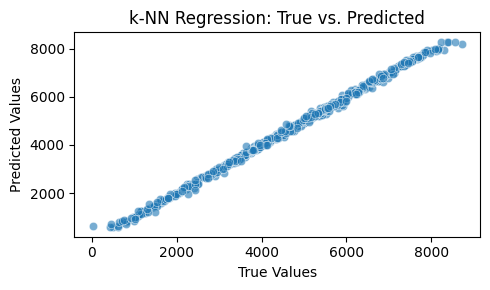

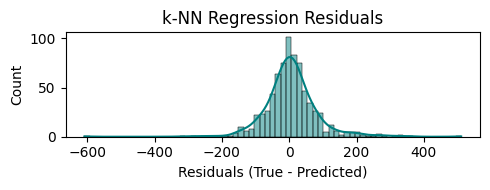

In [ ]:
# k-NN regression example
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
if y is not None:
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(X, y)
    print('k-NN regression score:', knn_reg.score(X, y))
    # Predict and visualize
    y_pred = knn_reg.predict(X)
    # Scatter plot: True vs. Predicted
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=y, y=y_pred, alpha=0.6)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('k-NN Regression: True vs. Predicted')
    plt.tight_layout(); plt.show()
    # Residuals histogram
    residuals = y - y_pred
    plt.figure(figsize=(5,2))
    sns.histplot(residuals, kde=True, color='teal')
    plt.xlabel('Residuals (True - Predicted)')
    plt.title('k-NN Regression Residuals')
    plt.tight_layout(); plt.show()

**Code Explanation:**
This cell demonstrates k-Nearest Neighbors regression with comprehensive evaluation:

**1. Model Setup:**
- `KNeighborsRegressor(n_neighbors=5)` creates a k-NN model with k=5
- k-NN predicts by averaging the target values of the 5 nearest training points
- Non-parametric method that doesn't assume linear relationships

**2. Model Evaluation:**
- `knn_reg.score(X, y)` returns R² score (coefficient of determination)
- Higher R² (closer to 1.0) indicates better model performance

**3. Visualization 1 - Predictions vs Reality:**
- Scatter plot comparing true values vs predicted values
- Points near the diagonal line indicate accurate predictions
- Allows visual assessment of model performance and bias

**4. Visualization 2 - Residuals Analysis:**
- `residuals = y - y_pred` calculates prediction errors
- Histogram of residuals should be roughly normal and centered at zero
- Systematic patterns in residuals indicate model limitations

**5. k-NN Characteristics:**
- Can capture non-linear relationships unlike linear regression
- Performance depends heavily on choice of k and feature scaling
- Works well with local patterns in data

This comprehensive evaluation approach helps assess both model accuracy and assumptions.

## Summary
- k-NN regression predicts the average value of the k nearest neighbors, making it a simple yet powerful non-parametric method.
- The choice of k and feature scaling are critical for good performance.
- Visualizing predictions and residuals helps assess model fit and detect issues.

## Review Questions
- What does k-NN regression predict for a new data point?
- Why is feature scaling important for k-NN methods?
- How does the choice of k affect the model's bias and variance?
- What visualizations are useful for evaluating k-NN regression results?

---

# k-Nearest Neighbors (Classification)
k-NN classification predicts the most common class among the k nearest neighbors.

**Intuition:**
- For a new data point, k-NN finds the k closest points in the training data (using a distance metric, usually Euclidean distance).
- The predicted class is the majority class (mode) among these k neighbors.
- Like regression, k-NN classification is non-parametric and instance-based: it does not learn explicit parameters, but relies on the training data for predictions.

**Distance metrics:**
- Euclidean distance is most common, but others (Manhattan, Hamming for categorical data) can be used.
- Features should be scaled to ensure fair distance calculations.

**Handling ties:**
- If there is a tie among the k neighbors (e.g., equal votes for two classes), the prediction may be chosen randomly or by another rule (e.g., smallest label).
- Using an odd value for k can help reduce ties in binary classification.

**Practical considerations:**
- k-NN classification can model complex decision boundaries, but is sensitive to noisy data and irrelevant features.
- The choice of k affects bias-variance tradeoff: small k = low bias, high variance; large k = high bias, low variance.
- k-NN can be computationally expensive for large datasets.
- Not well-suited for high-dimensional data due to the curse of dimensionality.

$\hat{y} = \text{mode}(y_{(1)}, \ldots, y_{(k)})$

k-NN classification score: 0.08481532147742818


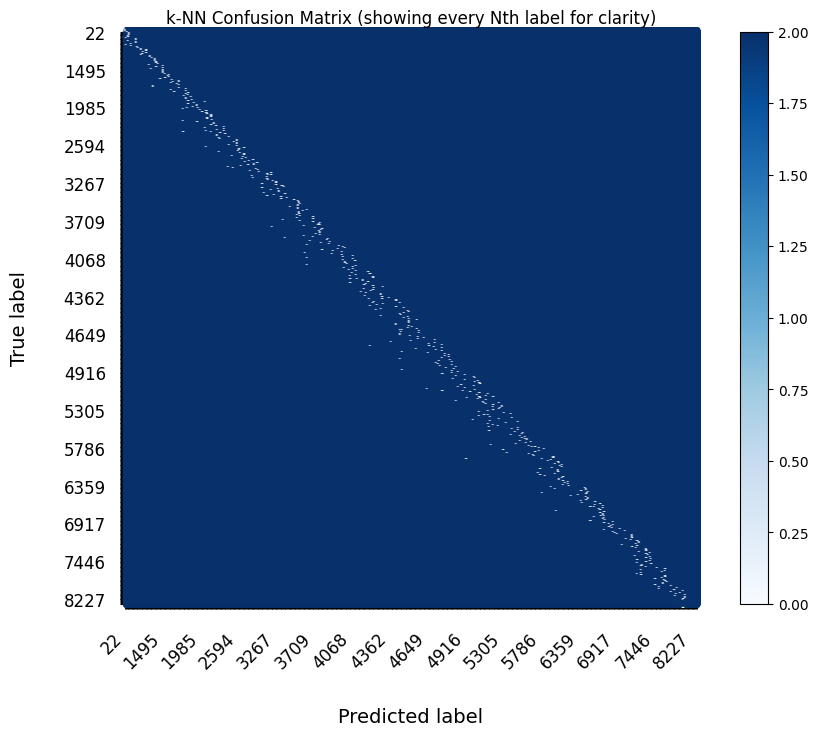

Sample of predictions:
 True  Predicted
  985        605
  801        623
 1349       1263
 1562       1526
 1600       1543


In [ ]:
# k-NN classification example
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
y_class = df[target_col]
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X, y_class)
score = knn_clf.score(X, y_class)
print('k-NN classification score:', score)
# Visualize confusion matrix
y_pred = knn_clf.predict(X)
cm = confusion_matrix(y_class, y_pred, labels=knn_clf.classes_)
fig, ax = plt.subplots(figsize=(10, 8))  # Larger figure for more space
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot(cmap='Blues', ax=ax, colorbar=True)
plt.title('k-NN Confusion Matrix (showing every Nth label for clarity)')
plt.xlabel('Predicted label', fontsize=14, labelpad=25)
plt.ylabel('True label', fontsize=14, labelpad=25)
# Show only every Nth label for clarity
max_labels = 15
n_classes = len(knn_clf.classes_)
N = max(1, n_classes // max_labels)
xticklabels = list(knn_clf.classes_)
yticklabels = list(knn_clf.classes_)
for i, label in enumerate(ax.get_xticklabels()):
    if i % N != 0:
        label.set_visible(False)
    else:
        label.set_fontsize(12)
        label.set_rotation(45)
        label.set_ha('right')
for i, label in enumerate(ax.get_yticklabels()):
    if i % N != 0:
        label.set_visible(False)
    else:
        label.set_fontsize(12)
plt.tick_params(axis='x', which='major', pad=15)
plt.tick_params(axis='y', which='major', pad=10)
plt.grid(visible=True, axis='both', linestyle=':', linewidth=0.5, alpha=0.5)
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.98, top=0.92)  # More margin for labels
plt.tight_layout(pad=3.0)
plt.show()
# Show a sample of predictions
sample_df = pd.DataFrame({'True': y_class.values, 'Predicted': y_pred})
print('Sample of predictions:')
print(sample_df.head().to_string(index=False))

**Code Explanation:**
This cell demonstrates k-NN classification with detailed confusion matrix visualization:

**1. Model Setup:**
- `KNeighborsClassifier(n_neighbors=5)` creates a k-NN classifier
- Uses majority voting among 5 nearest neighbors for prediction
- Works for both binary and multi-class classification

**2. Model Training and Evaluation:**
- `knn_clf.score(X, y_class)` returns classification accuracy
- Shows overall performance as percentage of correct predictions

**3. Confusion Matrix Analysis:**
- `confusion_matrix()` creates a table of true vs predicted class counts
- `ConfusionMatrixDisplay()` provides professional visualization
- Diagonal elements show correct predictions, off-diagonal show errors

**4. Visualization Enhancements:**
- Large figure size (10x8) accommodates many classes
- Smart label management: shows only every Nth label to avoid overcrowding
- Custom formatting: rotated labels, proper spacing, grid lines
- Color coding helps identify patterns in classification errors

**5. Sample Predictions:**
- `pd.DataFrame({'True': y_class.values, 'Predicted': y_pred})` shows actual predictions
- Helps understand model behavior on individual cases

**6. Advanced Features:**
- Handles datasets with many classes gracefully
- Provides both visual (heatmap) and numeric (sample) assessment
- Professional presentation suitable for reports/presentations

This comprehensive approach to classification evaluation is essential for understanding model performance beyond simple accuracy metrics.

## Summary
- k-NN classification assigns the most common class among the k nearest neighbors to a new data point.
- The method is simple, non-parametric, and can model complex decision boundaries.
- The choice of k and proper feature scaling are crucial for effective classification.
- Confusion matrices and sample predictions help evaluate classification performance.

## Review Questions
- How does k-NN classification determine the predicted class for a new sample?
- What are the effects of using a small vs. large k in k-NN classification?
- Why is it important to scale features before applying k-NN?
- What tools can you use to evaluate the performance of a k-NN classifier?

---

# Finding the Optimal k and Cross Validation
Use cross-validation to select the best k.

$\text{CV Score} = \frac{1}{K} \sum_{i=1}^K \text{Score}_i$

In [ ]:
# Example: Cross-validation for k-NN
from sklearn.model_selection import cross_val_score
import numpy as np
if y is not None:
    scores = []
    for k in range(1, 11):
        knn = KNeighborsRegressor(n_neighbors=k)
        score = cross_val_score(knn, X, y, cv=5).mean()
        scores.append(score)
    print('Best k:', np.argmax(scores)+1, 'with CV score:', max(scores))

Best k: 4 with CV score: 0.9786440994202088


**Code Explanation:**
This cell demonstrates hyperparameter optimization using cross-validation:

**1. Hyperparameter Search:**
- Tests k values from 1 to 10 for k-NN regression
- `range(1, 11)` creates the sequence of k values to test
- Systematic approach to finding optimal model parameters

**2. Cross-Validation:**
- `cross_val_score(knn, X, y, cv=5)` performs 5-fold cross-validation
- Splits data into 5 parts: trains on 4, tests on 1, repeats 5 times
- `.mean()` averages the 5 scores for robust performance estimate

**3. Model Selection:**
- `scores.append(score)` collects performance for each k value
- `np.argmax(scores)+1` finds the k with highest CV score
- `max(scores)` shows the best performance achieved

**4. Why This Matters:**
- **Prevents overfitting**: Uses separate folds for validation
- **Robust evaluation**: Averages multiple train/test splits
- **Optimal performance**: Finds best hyperparameters systematically
- **Generalizable results**: Better estimates of real-world performance

**5. Cross-Validation Benefits:**
- More reliable than single train/test split
- Uses all data for both training and validation
- Standard practice in machine learning

This demonstrates proper model selection methodology that's essential for building reliable machine learning models.

# K-Fold Cross Validation
K-fold cross-validation splits data into K parts, trains on K-1, tests on the remaining, and repeats.

$\text{CV Score} = \frac{1}{K} \sum_{i=1}^K \text{Score}_i$

---

# Summary and Self-Assessment

## Key Takeaways
- **NumPy** provides fast, efficient operations on homogeneous arrays and is the foundation for numerical computing in Python.
- **Pandas** builds on NumPy, offering labeled, heterogeneous data structures (Series, DataFrame) and powerful data manipulation tools.
- Always inspect your data after loading: check types, missing values, outliers, and encoding issues.
- Distinguish between **categorical** and **continuous** features, and between **regression** and **classification** tasks.
- Use **EDA** (Exploratory Data Analysis) to visualize and summarize your data before modeling.
- Transform features as needed: convert categorical to numerical, normalize, and engineer new features.
- Extract features using `iloc`, `loc`, and column names; encode categorical variables with one-hot or ordinal mapping.
- Use `pd.crosstab` and confusion matrices to analyze relationships and evaluate classification results.
- Be aware of **unbalanced data**, **dirty data**, and the risks of **p-hacking**.
- Understand the concepts of **generalization**, **overfitting**, and **underfitting**.
- Model complexity and dataset size affect the bias-variance tradeoff.
- **k-Nearest Neighbors** can be used for both regression and classification; use cross-validation to select optimal parameters.
- **K-fold cross-validation** is essential for robust model evaluation.

## Review Questions
- What are the main differences between NumPy and Pandas?
- What are the first things you should check after loading a dataset?
- How do you distinguish between categorical and continuous features?
- How do you convert categorical features to numerical features?
- What is the purpose of EDA?
- How do you extract columns from a DataFrame using different methods?
- What is the difference between one-hot encoding and ordinal mapping?
- How do you handle unbalanced data?
- What is p-hacking and why is it problematic?
- Explain the concepts of generalization, overfitting, and underfitting.
- How does model complexity relate to the bias-variance tradeoff?
- How does k-NN work for regression and classification?
- Why is cross-validation important in model selection?

---